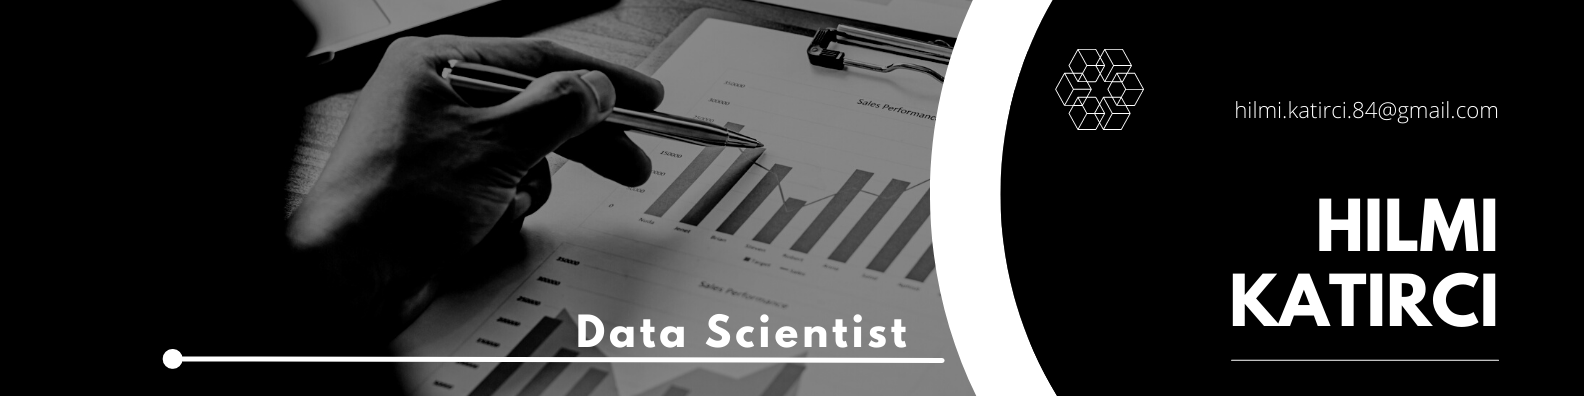

## Word_embedding

Word embedding, bir kelime veya ifade için düz bir vektör olarak ifade edilmesidir. Bu vektörler, kelimelerin anlamları arasındaki benzerlikleri yansıtmak üzere öğrenilir. Bu sayede, yapay zeka modelleri kelimeler arasındaki ilişkileri daha iyi anlayabilir

Word embedding, metin verileri kullanılarak öğrenilir. Örneğin, bir metin corpus'u (büyük metin veritabanı) kullanarak, her kelime için çevresindeki kelimeler ile ilişkisini öğrenir. Bu ilişki, kelime ve çevresindeki kelimeler arasındaki co-occurrence (ortak görünüm) frekansı olarak tanımlanır. Daha sonra, bu co-occurrence verileri kullanarak, her kelime için bir vektör oluşturulur. Bu vektörler, kelimelerin anlamları arasındaki benzerlikleri yansıtmak üzere tasarlanır.

Örneğin, "king" ve "queen" kelimeleri sıklıkla aynı metinlerde görülür ve benzer anlamlar taşır, bu nedenle oluşan vektörleri birbirine yakın olacak. Ancak "king" ve "orange" kelimeleri sıklıkla aynı metinlerde görülmez ve farklı anlamlar taşır, bu nedenle oluşan vektörleri birbirinden uzak olacak.

## Feature Representation (Feature Extraction for word embeddings)

ML'de, feature extraction, veri kümesinde bulunan özellikleri veya nitelikleri belirlemek için kullanılan bir yöntemdir. Bu özellikler, veri kümesindeki verileri anlamlı bir şekilde ifade etmelerine olanak tanır. Bu özellikler, veri kümesinden el ile seçilir.

DL'de ise, feature extraction, veri kümesindeki özellikleri öğrenmek için kullanılan bir yöntemdir. Bu yöntem için kullanılan yöntemler arasında Convolutional Neural Network (CNN) ve Recurrent Neural Network (RNN) gibi yapay sinir ağları yer almaktadır. Bu yapay sinir ağları, veri kümesinden özellikleri otomatik olarak öğrenir ve bu özellikler, veri kümesindeki verileri daha anlamlı bir şekilde ifade etmelerine olanak tanır.

Özet olarak, ML'de özellikler elle seçilirken, DL'de özellikler otomatik olarak öğrenilir.

## Word2Vec

In [1]:
# pip install gensim
# conda install -c conda-forge gensim

# gensim kütüphanesi anaconda'da default yüklü olarak geliyor.

In [2]:
from nltk.tokenize import word_tokenize
import pandas as pd
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('newspaper.zip', names = ["news"])
df

# pandas'ın read_csv fonksiyonu zip'li dosyaları da okuyabiliyor. feature isimlendirmesi için names parametresini kullanıyoruz.
# names parametresi kullanılmaz ise ilk satırdaki text deafault olarak feature names olarak atanır.

,news
0,iran devlet televizyonu ülkedeki eyaletin sind...
1,gösterilerde fitnecilere ölüm münafıklara ölüm...
2,dini lider ali hamaney ve cumhurbaşkanı mahmud...
3,musevi ye ölüm ve idam idam sloganları duyuldu
4,muhalefet liderleri kaçtı mı aşure günü yaşana...
...,...
411520,dışişleri bakanlığı ndan yapılan yazılı açıkla...
411521,açıklamada abd nin ankara büyükelçiliği ve ist...
411522,seyahat uyarısı güncelleme kararının temmuz da...
411523,amerikalı turistlerin açıkça türkiye deki ulus...


In [4]:
df.news[0]

'iran devlet televizyonu ülkedeki eyaletin sinde yapılan reformcuları protesto amaçlı yürüyüşlere milyonlarca kişinin katıldığını bildirdi '

In [5]:
word_tokenize(df.news[0])

['iran',
 'devlet',
 'televizyonu',
 'ülkedeki',
 'eyaletin',
 'sinde',
 'yapılan',
 'reformcuları',
 'protesto',
 'amaçlı',
 'yürüyüşlere',
 'milyonlarca',
 'kişinin',
 'katıldığını',
 'bildirdi']

In [6]:
corpus = []

for i in df.index:
    corpus.append(word_tokenize(df.news[i]))

print(corpus[:5])

# word2vec algoritması tüm corpusun 2 boyutlu olmasını ister. Bu sebeple burdaki for döngüsü ile tüm documnetleri/satırları
# teker teker çekip word tokenlerine ayırıyoruz. Word_tokenize fonksiyonu default olarak texti word tokenlerine ayırıp bir 
# listeye atar. Bu listeler corpus listesine append edilerek corpus 2 boyutlu hale getiritir. 

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü']]


In [7]:
model = Word2Vec(corpus, vector_size=100, window=5, min_count=5, sg=1)

# vector_size, kaç boyutlu word embeddings istiyorsak burda belirtiyoruz.
# Bir token ile diğer tokenler arasındaki anlamsal ilişkiler kurulurken bu tokenin kaç önce ve sonrasındaki tokenler dikkate 
# alınarak eğitim yapılmasını istiyorsak window parametresinde belirtiyoruz. Tavsiye edilen 5-15 sayıları arasındadır.
# min_count, corpusta 5 veya daha az geçen tokenler eğitime dahil edilmez. Genellikle 3,4,5 gibi sayılar tercih edilir.
# sg =1 eğitimi skipgram'a göre yap.
# sg =0 eğitimi CBOW'a göre yap.

In [8]:
model.wv['ankara']

# 100 elemanlı/boyutlu word_embedding

array([ 0.1133033 ,  0.24116422, -0.15216658,  0.01714482,  0.05324475,
       -0.07199368, -0.3263281 ,  0.9425181 , -0.08447156, -0.2850108 ,
       -0.19681235, -0.74480176, -0.20388344, -0.07826672,  0.27308998,
        0.7776624 ,  0.3190063 , -0.47520196,  0.21987104, -1.0291914 ,
        0.13991909,  0.5375541 ,  0.54583824,  0.05075886, -0.05248567,
       -0.15572588, -0.24128614,  0.0983616 , -0.16603456,  0.14352623,
        0.43374512,  0.3157689 , -0.01214054, -0.4708157 ,  0.3777519 ,
        0.05754162, -0.25980753,  0.00470696,  0.29824367, -0.32358837,
        0.27172443,  0.09549268,  0.32279623, -0.05794214,  0.2586152 ,
        0.1802176 , -0.19460195,  0.06085467,  0.5924569 , -0.55028576,
        0.32329518,  0.04044457, -0.07849421, -0.17544043, -0.28802145,
       -0.17317526, -0.37942478, -0.34557444, -0.5286859 , -0.06497401,
       -0.11691892, -0.31797296,  0.10298466, -0.08420612, -0.29136455,
       -0.21487115,  0.02675003,  0.3247725 , -0.10340878, -0.00

In [9]:
model.wv.most_similar('öğretmen')

[('okuldaki', 0.7575600743293762),
 ('öğretmeni', 0.7492738366127014),
 ('öğrenci', 0.7377273440361023),
 ('lise', 0.7293009161949158),
 ('öğrenciyle', 0.7273640632629395),
 ('başörtülü', 0.7219657897949219),
 ('öğrencisinin', 0.7204939723014832),
 ('altice', 0.7161840200424194),
 ('üniversite', 0.7158815264701843),
 ('öğretmenin', 0.7154067158699036)]

In [10]:
model.wv.most_similar('kırmızı')

[('çizgileri', 0.6673220992088318),
 ('sarı', 0.6292896866798401),
 ('turuncu', 0.6232754588127136),
 ('gömlekliler', 0.6182063221931458),
 ('çizgi', 0.6181514263153076),
 ('gömlekli', 0.6129804253578186),
 ('renkli', 0.6052261590957642),
 ('yeşil', 0.5902448892593384),
 ('gömleklilerin', 0.5896851420402527),
 ('bültenle', 0.5874441266059875)]

In [11]:
model.wv.most_similar('eve')

[('evine', 0.8405503034591675),
 ('dükkana', 0.7394862771034241),
 ('apartmana', 0.7355875372886658),
 ('ofise', 0.7214536070823669),
 ('karakola', 0.7179901599884033),
 ('mağazaya', 0.7164252400398254),
 ('odasına', 0.7106141448020935),
 ('komşusunun', 0.705608069896698),
 ('lokantaya', 0.7053973078727722),
 ('kulübüne', 0.7037385702133179)]

In [12]:
model.wv.most_similar('mavi')

[('marmara', 0.8915885090827942),
 ('gemisine', 0.6813586950302124),
 ('baskınıyla', 0.6665721535682678),
 ('filosundaki', 0.6320429444313049),
 ('baskınına', 0.6286933422088623),
 ('dökme', 0.621772289276123),
 ('filo', 0.6095814108848572),
 ('gemisindeki', 0.6053619384765625),
 ('filodaki', 0.6013056635856628),
 ('gemilere', 0.5983052253723145)]

In [13]:
model.wv.most_similar(positive=['öğrenme', 'doktor'], negative=['tedavi'], topn=5)

[('eğitimciler', 0.6688698530197144),
 ('bilişsel', 0.6576677560806274),
 ('tanıtıp', 0.6548921465873718),
 ('edebi', 0.6524541974067688),
 ('almancayı', 0.6467149257659912)]

In [14]:
model.wv.most_similar(positive=['ankara', 'belçika'], negative=['brüksel'], topn=1)

[('hollanda', 0.6450004577636719)]

In [15]:
model.save("word2vec.model")

In [16]:
model = Word2Vec.load("word2vec.model")

## Glove

In [17]:
from gensim.models import KeyedVectors

# KeyedVectors fonksiyonunu farklı bir formattaki word embeddingleri word2vec formatına dönüştürmek için kullanıyoruz.

In [18]:
glove_model = 'glove.6B.100d.txt'
model2 = KeyedVectors.load_word2vec_format(glove_model, no_header=True) #'glove.6B.100d.txt'

# 'glove.6B.100d.txt' word embedding textinde (vocab_size, vector_size) boyutuna ilişkin bir bildirim olmadığından KeyedVectors
# dönüştürücüsünün tüm texti tarayıp (vocab_size, vector_size) boyutunu tespit etmesi ve buna göre ilgili token/kelimelere
# karşılık gelen vektörleri döndürmesi gerekir. Bunu yapabilmesi için no_header=True olarak düzenleniyor.

In [19]:
model2['teacher']

array([ 0.44374 ,  0.67311 , -0.51096 ,  0.20882 , -0.10662 ,  0.55098 ,
       -0.035593,  0.25126 , -0.32789 ,  1.0762  , -0.49637 , -0.4298  ,
        0.36764 ,  0.57894 , -0.25027 , -0.41021 ,  0.086998, -0.16843 ,
       -0.85764 ,  1.0404  , -1.0314  ,  0.095147,  0.30729 ,  0.12348 ,
        0.22745 , -0.52157 , -0.72478 , -1.0843  ,  0.035966,  0.62985 ,
       -1.0991  ,  0.67161 ,  0.33797 ,  0.14551 , -0.90049 , -0.064415,
       -0.75247 ,  0.21741 ,  0.51594 , -0.46291 , -0.77598 ,  0.40705 ,
        0.1889  , -0.43402 ,  0.23202 , -0.081453, -0.3882  , -0.34444 ,
        0.080225, -0.28274 , -0.38869 , -0.58152 , -0.25558 ,  1.0027  ,
       -0.11114 , -1.5402  , -0.16761 , -0.26558 ,  0.9325  ,  0.069397,
        0.96618 ,  0.15449 , -0.22905 , -0.1761  ,  0.13225 , -0.55741 ,
        0.9234  , -0.04845 ,  0.50202 ,  1.0144  , -0.1256  ,  0.30486 ,
        0.090808,  0.17642 , -0.23146 ,  0.68386 ,  0.37269 , -0.37316 ,
       -0.025728, -1.0279  , -0.33142 ,  0.036028, 

In [20]:
model2.most_similar('ankara')

[('turkey', 0.7512096762657166),
 ('istanbul', 0.6787630319595337),
 ('turkish', 0.6690374612808228),
 ('damascus', 0.6372509002685547),
 ('tbilisi', 0.6322181820869446),
 ('erdogan', 0.6258037090301514),
 ('moscow', 0.6217040419578552),
 ('brussels', 0.6181439161300659),
 ('skopje', 0.6164302825927734),
 ('cyprus', 0.6064029932022095)]

In [21]:
model2.most_similar('teacher')

[('student', 0.8083399534225464),
 ('school', 0.7545564770698547),
 ('teaching', 0.7521439790725708),
 ('taught', 0.741184651851654),
 ('teachers', 0.7291542887687683),
 ('graduate', 0.7134960293769836),
 ('instructor', 0.7077120542526245),
 ('students', 0.6828974485397339),
 ('teaches', 0.6552315354347229),
 ('education', 0.6528989672660828)]

In [22]:
model2.most_similar('doctor')

[('physician', 0.7673239707946777),
 ('nurse', 0.75215083360672),
 ('dr.', 0.7175194025039673),
 ('doctors', 0.7080884575843811),
 ('patient', 0.7074184417724609),
 ('medical', 0.6995992660522461),
 ('surgeon', 0.6905338168144226),
 ('hospital', 0.6900930404663086),
 ('psychiatrist', 0.658909797668457),
 ('dentist', 0.6447421312332153)]

In [23]:
model2.most_similar(positive=['woman', 'son'], negative=['man'], topn=1)

[('daughter', 0.9090957045555115)]

In [24]:
model2.most_similar(positive=['woman', 'father'], negative=['man'], topn=1)

[('mother', 0.9024619460105896)]

In [25]:
model2.most_similar(positive=['woman', 'uncle'], negative=['man'], topn=1)

[('aunt', 0.836803138256073)]

In [26]:
model2.most_similar(positive=['ankara', 'germany'], negative=['berlin'], topn=1)

[('turkey', 0.81471186876297)]

In [27]:
model2.most_similar(positive=['teach', 'doctor'], negative=['treat'], topn=1)

[('teacher', 0.7610154151916504)]

In [28]:
model2.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.7698541283607483)]

In [29]:
model2.most_similar(positive=['love', 'jealous'], negative=['hate'], topn=1)

[('lover', 0.7032662630081177)]

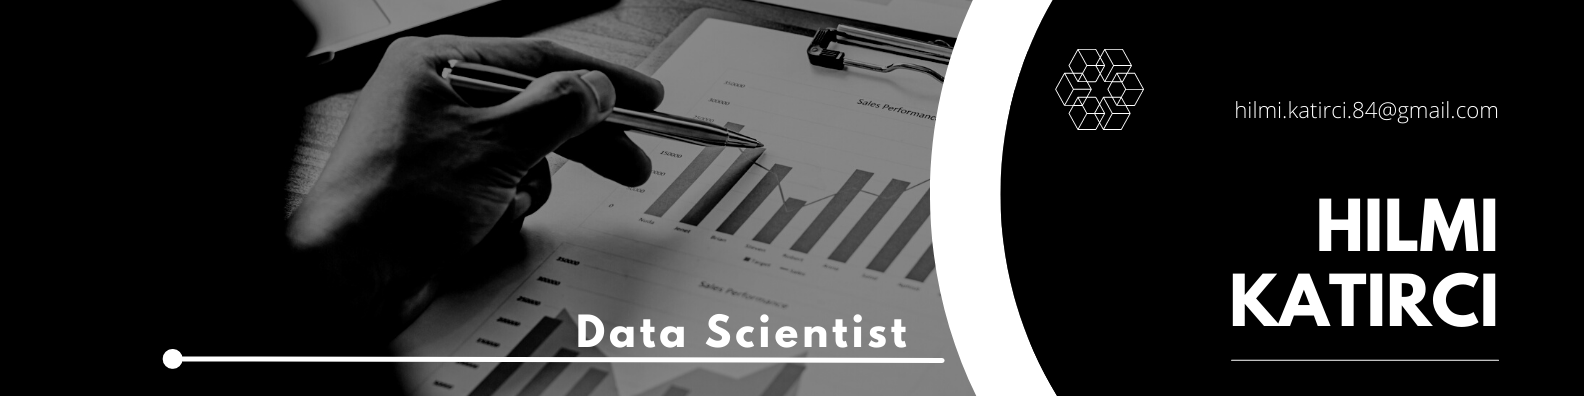